In [1]:
# Import the data manipulation library

In [2]:
import pandas as pd

import numpy as np

In [3]:
# Import the data visualization library

In [4]:
import seaborn as sns 

import matplotlib.pyplot as plt

In [5]:
# Import the ignore warnings

In [8]:
import warnings

warnings.filterwarnings('ignore')

In [9]:
# Load the data set 

In [10]:
data_train=pd.read_csv("train (1).csv")

In [11]:
data_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# Data Analysis in train dataset

    * PassengerId - It's denoted by a passenger number.

    * Survived - 0 means is died and 1 means is survived ("TARGET")

    * pclass -  passenger class number 1,2,3 class ("Feature")

    * Name - Passenger Name 

    * sex - Male or female ("TARGET")

    * age - passenger age 

    * SibSp - sibling and spouses in passenger ("TARGET")

    * Parch- children and parents in passenger ("TARGET")

    * Ticket- passenger ticker details

    * Fare - price in numbers 

    * cabin- Cabin number 

    * Embarked - S:Southampton, C:Cherbourg, and Q: Queenstown.

# Basic checks

In [12]:
data_train.shape

(891, 12)

In [13]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
num_var=data_train.describe(include=None)

num_var

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
num_var.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [18]:
cat_var=data_train.describe(include='object')

cat_var

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [19]:
cat_var.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [31]:
for i in data_train.columns:
    print(data_train[i].value_counts())

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00

# EDA

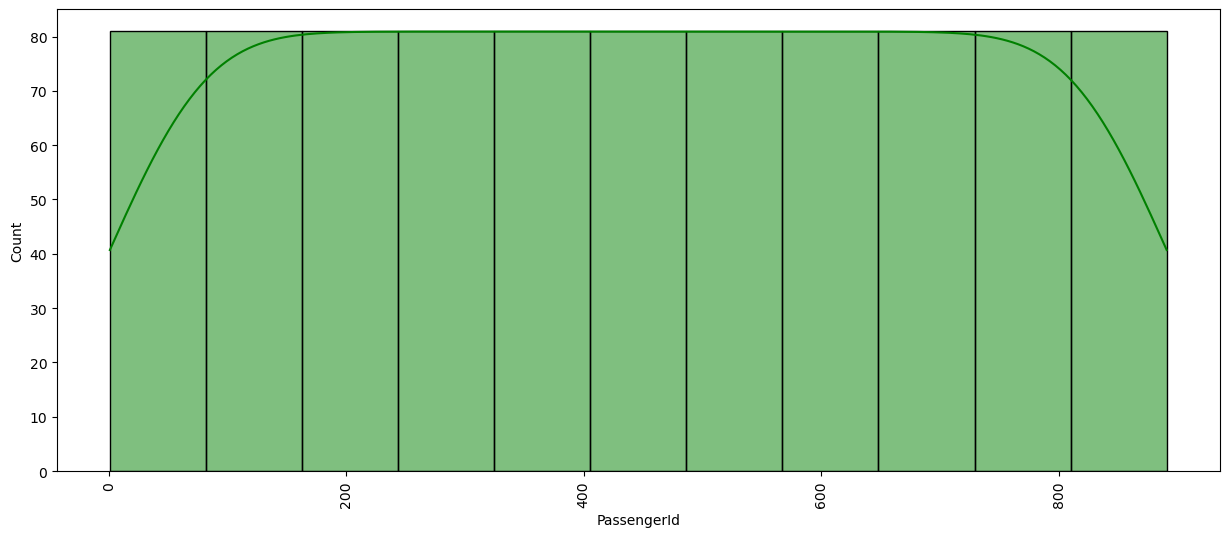

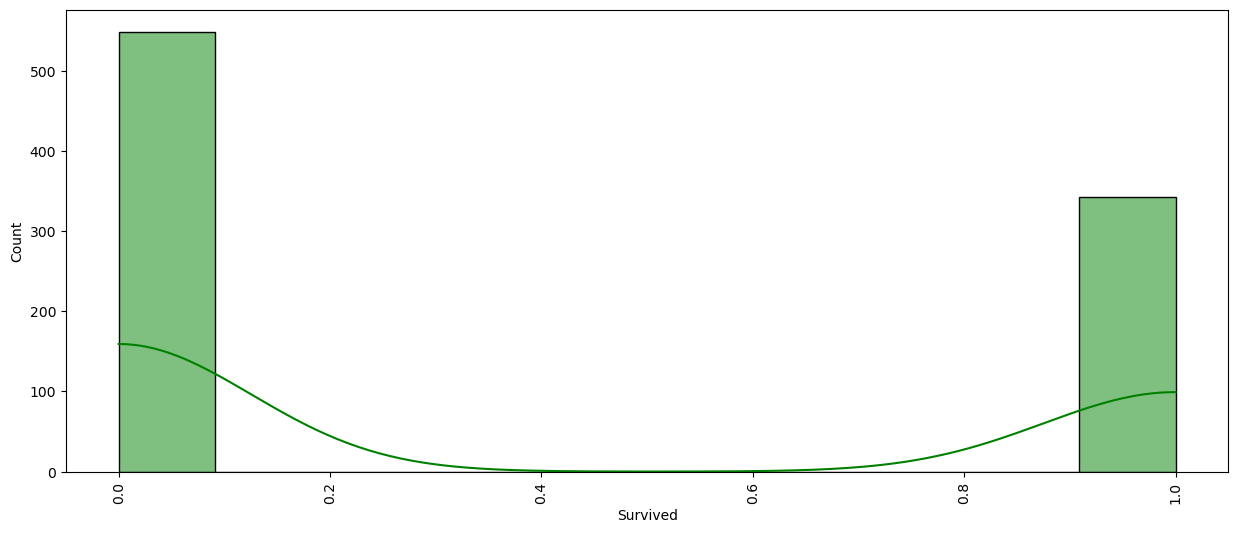

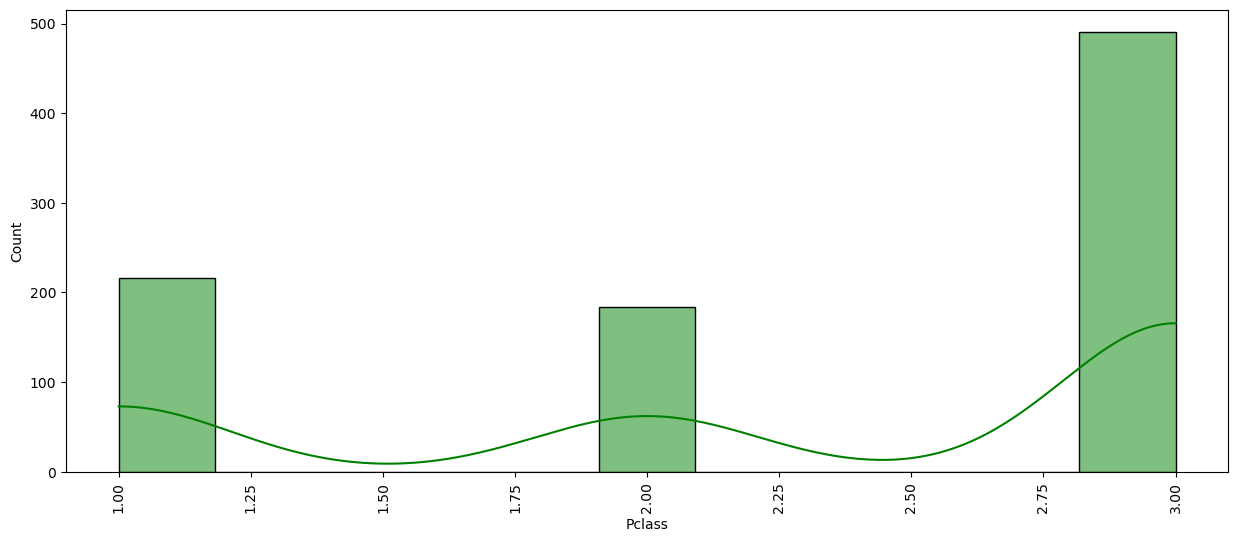

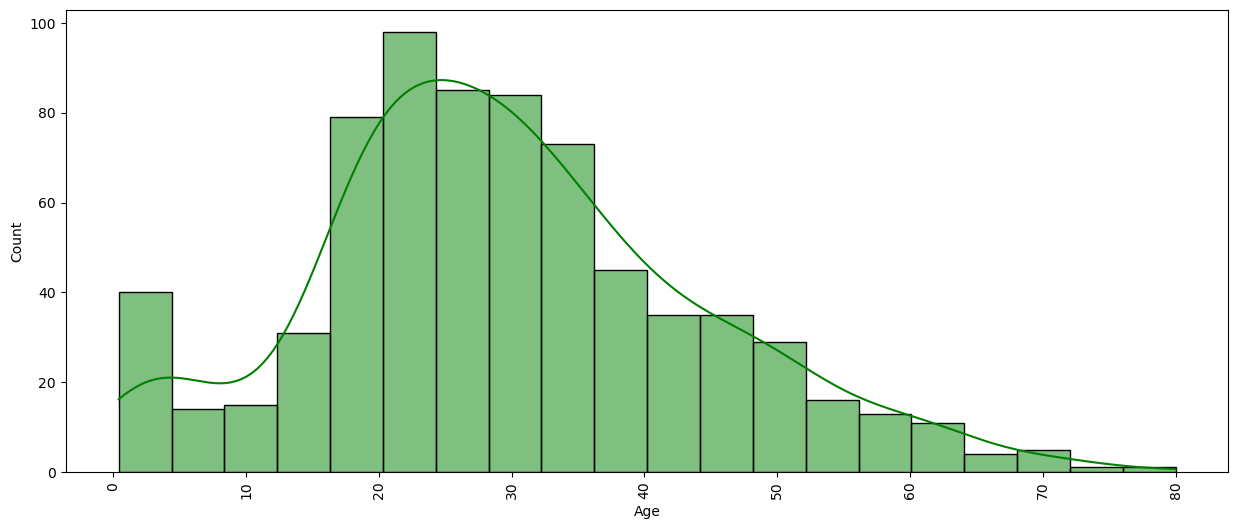

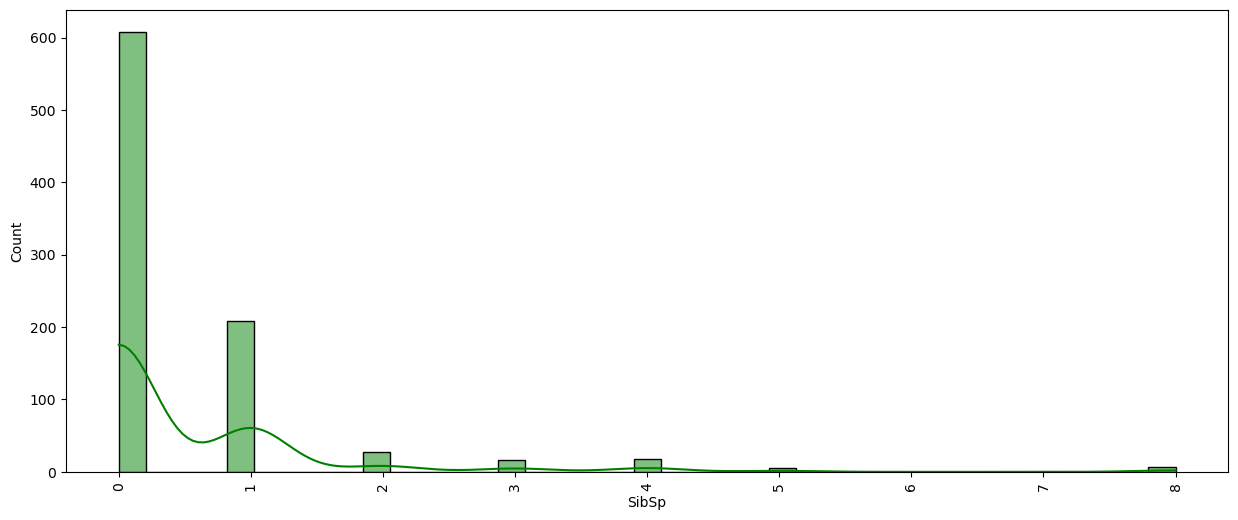

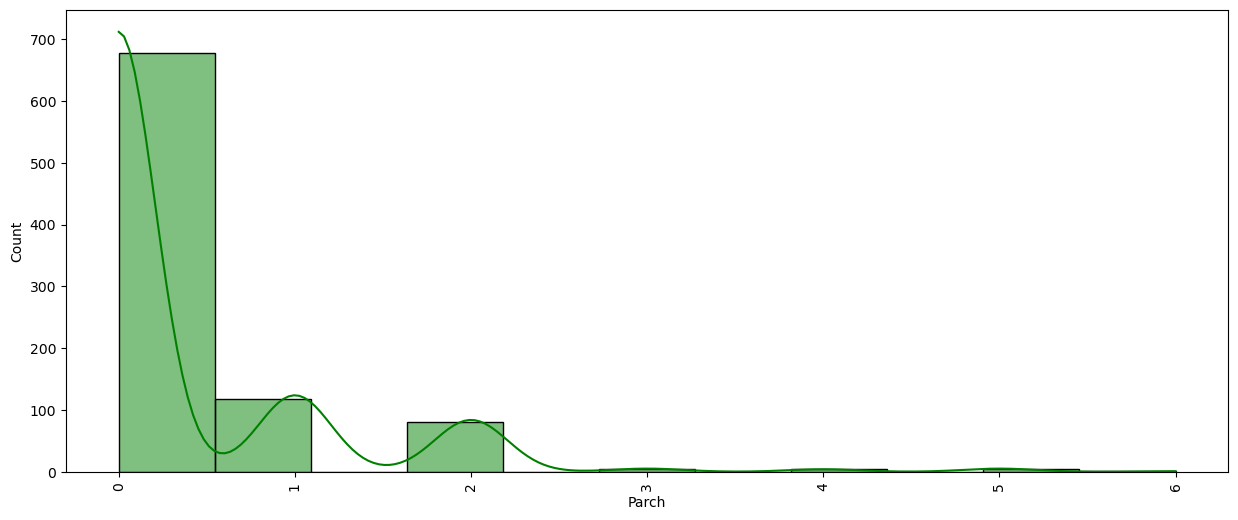

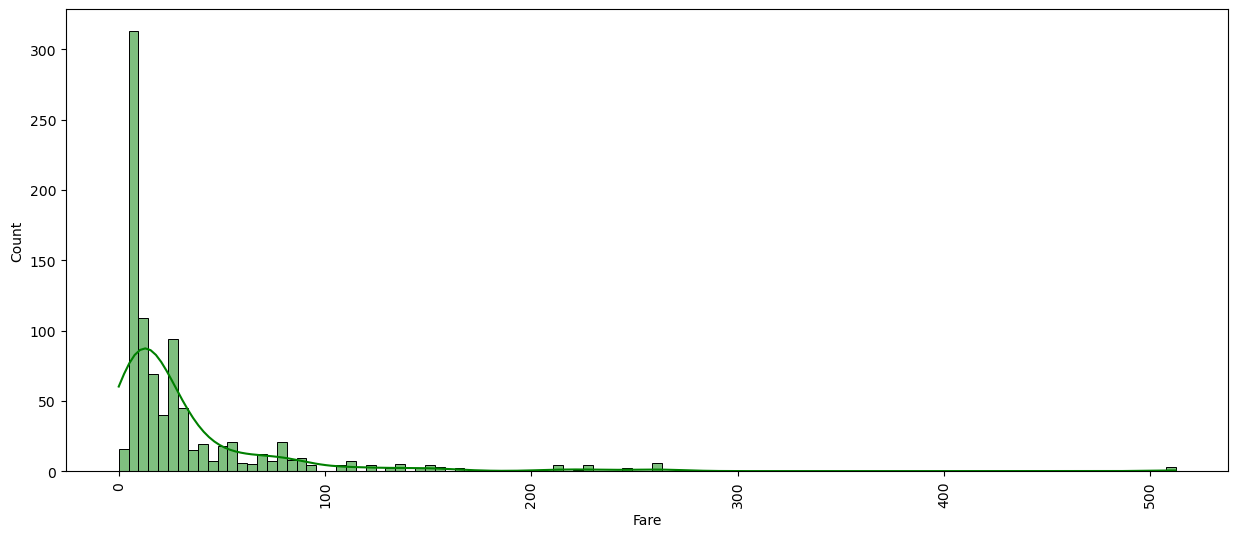

In [35]:
for i in num_var:
    
    plt.figure(figsize=(15,6))

    sns.histplot(data_train[i], kde=True, color='green')

    plt.xlabel(i)

    plt.xticks(rotation=90)

    plt.show()


In [38]:
cat_var.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

<Axes: xlabel='count', ylabel='Sex'>

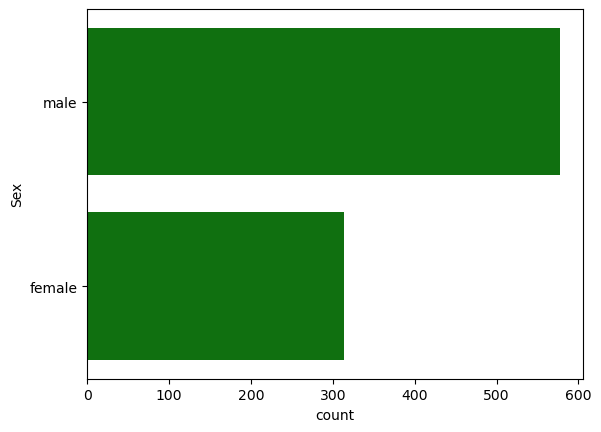

In [42]:
sns.countplot(y='Sex',data=data_train,color='green')

<Axes: xlabel='count', ylabel='Embarked'>

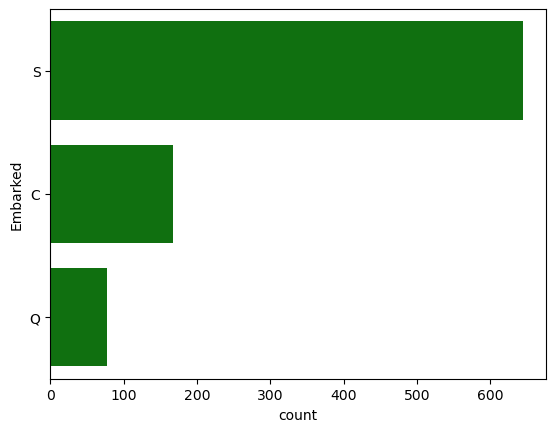

In [43]:
sns.countplot(y='Embarked', data=data_train,color='green')

# Data preprocessing

In [51]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
data_train.duplicated().sum()

0

In [57]:
data_train['Embarked'].fillna(data_train['Embarked'].mode()[0],inplace=True)

In [59]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

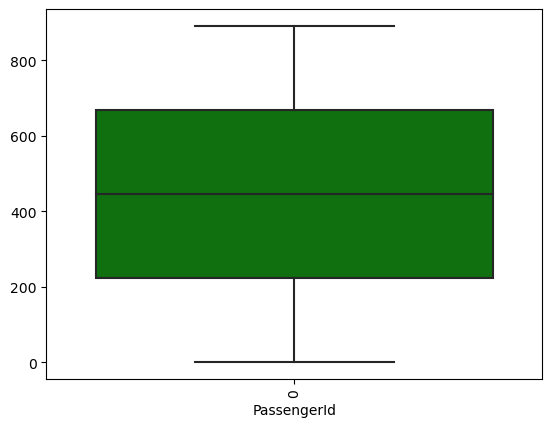

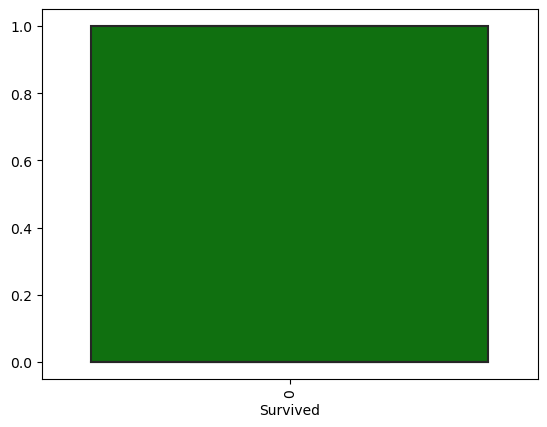

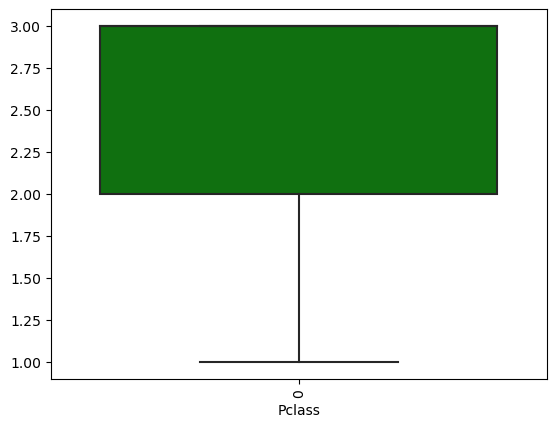

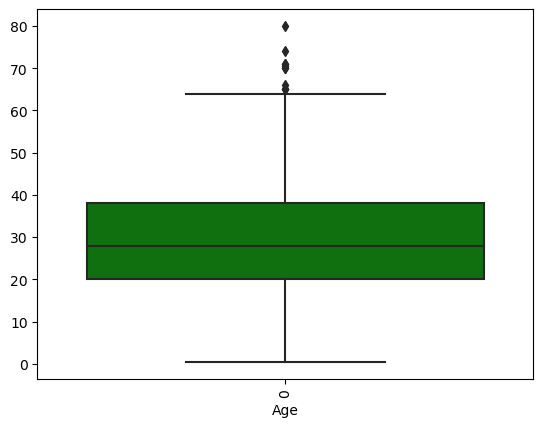

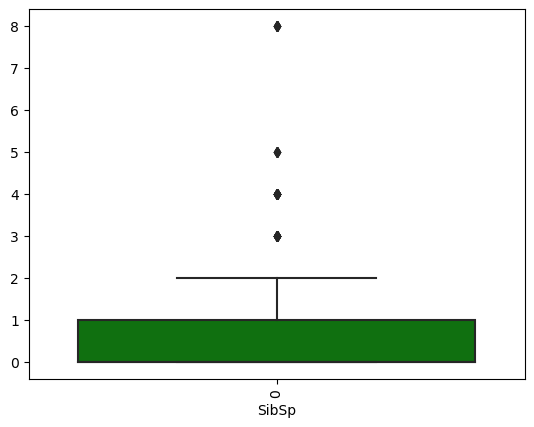

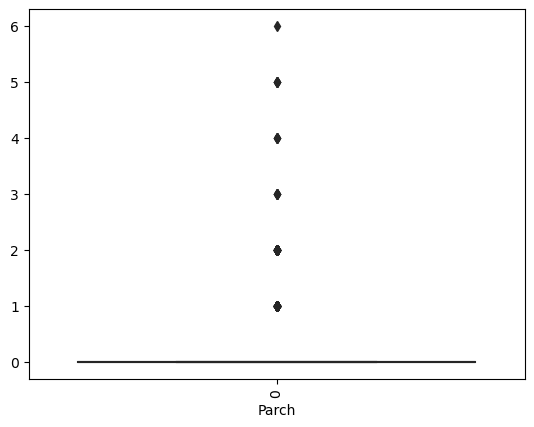

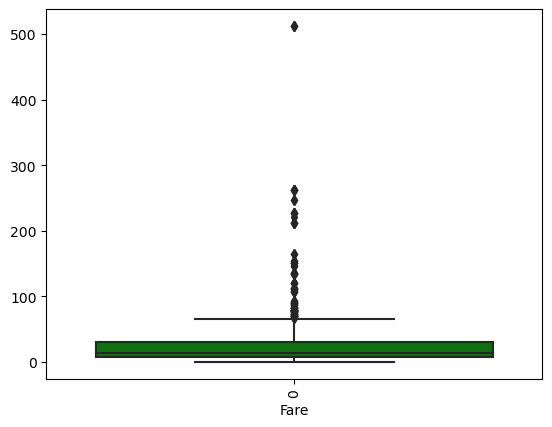

In [61]:
for i in num_var:

    plt.Figure(figsize=(15,6))

    sns.boxplot(data_train[i],color='green')

    plt.xlabel(i)

    plt.xticks(rotation=90)

    plt.show()

In [62]:
data_train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Encoding


In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_encoder=LabelEncoder()

In [65]:
data_train['Sex']=label_encoder.fit_transform(data_train['Sex'])

In [68]:
data_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,NaN,S


In [71]:
x=data_train[['Pclass','Sex','SibSp','Parch']]

In [72]:
x

,Pclass,Sex,SibSp,Parch
0,3,1,1,0
1,1,0,1,0
2,3,0,0,0
3,1,0,1,0
4,3,1,0,0
...,...,...,...,...
886,2,1,0,0
887,1,0,0,0
888,3,0,1,2
889,1,1,0,0


In [74]:
y=data_train[['Survived']]

In [75]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [76]:
# scalling 

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
scal_minmax=MinMaxScaler()

In [79]:
X=scal_minmax.fit_transform(x)

In [80]:
X

array([[1.        , 1.        , 0.125     , 0.        ],
       [0.        , 0.        , 0.125     , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       ...,
       [1.        , 0.        , 0.125     , 0.33333333],
       [0.        , 1.        , 0.        , 0.        ],
       [1.        , 1.        , 0.        , 0.        ]])

# ML Models

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=45)

In [84]:
#  Decision Tree classifier 

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
ds=DecisionTreeClassifier()

In [88]:
ds.fit(X_train, y_train)

DecisionTreeClassifier()

In [90]:
pred=ds.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix,classification_report

In [97]:
print("Accuracy :\n",accuracy_score(y_test,pred))

print("\n Conf_matrix: \n",confusion_matrix(y_test,pred))

print("\n classification report : \n",classification_report(y_test,pred))

Accuracy :
 0.8222222222222222

 Conf_matrix: 
 [[32  4]
 [ 4  5]]

 classification report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        36
           1       0.56      0.56      0.56         9

    accuracy                           0.82        45
   macro avg       0.72      0.72      0.72        45
weighted avg       0.82      0.82      0.82        45



In [99]:
from sklearn import tree
import matplotlib.pyplot as plt

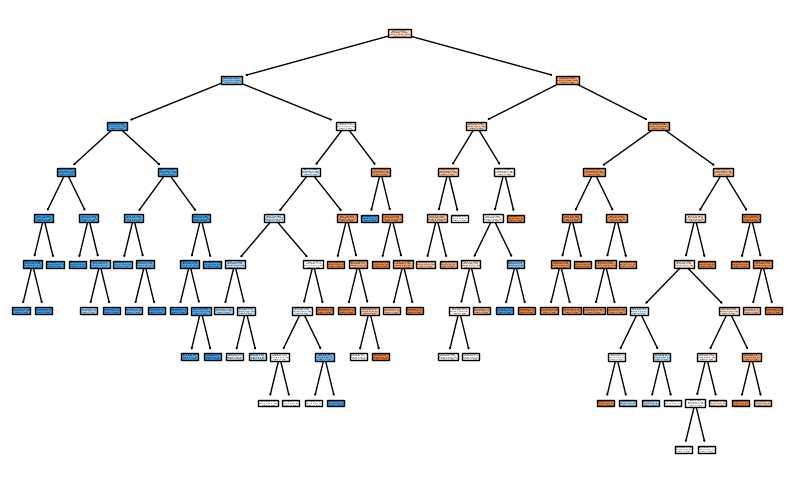

In [103]:
plt.figure(figsize=(10, 6))
tree.plot_tree(ds, filled=True, feature_names=x.columns, class_names=True)  
plt.show()